# Cissa gap filling example - Monte-Carlo component method
We can use CiSSA to fill in gaps of a time-series by making an initial guess for missing values, then iterating through CiSSA fitting until we reach a convergence.

In [1]:
#importing required packages
import pandas as pd
import numpy as np
import copy
import os
import warnings
warnings.filterwarnings('ignore')
os.chdir('../../..')
home_path = os.path.abspath('')
from pycissa import Cissa

In [2]:
## Read data file  (source is the Ministry of Economy of Spain.)
data = pd.read_excel(home_path + r'/data/EPC.xlsx',sheet_name = 'Data')

Here we will replace some data with NaN values to simulate missing values.

In [3]:
data_with_gaps = copy.deepcopy(data)
data_with_gaps['Electric power consumption in Spain'][100] = np.nan
data_with_gaps['Electric power consumption in Spain'][200] = np.nan
data_with_gaps['Electric power consumption in Spain'][300] = np.nan
data_with_gaps['Electric power consumption in Spain'][400] = np.nan
data_with_gaps['Electric power consumption in Spain'][500] = np.nan
print(data_with_gaps['Electric power consumption in Spain'][499:502])

499    21425.56417
500            NaN
501    19817.63946
Name: Electric power consumption in Spain, dtype: float64


In [4]:
#create the cissa object
cissa_object = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])

### We can either fix the values before running CiSSA using the pre_fill_gaps function, or use auto_cissa which will do the job as part of the automated process.

We will use monte-carlo method to find significant components. All other components will be thrown away during the gap filling process.  

In [5]:
#here we choose a window length of 5 years. You can try other windown lengths to see how it effects the error rate
#we add some parameters to control the gap filling
cissa_object.auto_cissa(L = 12*5,
                       K_surrogates = 5, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling. For 10 repeats we remove 10 known points, gap fill, and calculate the error. On the last run all points are included (none removed) 
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 500, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value is 50 - adjust this for your time series
                        verbose = True #just so we can see what is going on...
                       )

Checking for censored or nan data...
Step 0 of 20
iteration 0.  6089.077347209321  vs target error:  50
iteration 1.  939.1743044389514  vs target error:  50
iteration 2.  170.1667303469403  vs target error:  50
iteration 3.  30.808591178269126  vs target error:  50
Step 1 of 20
iteration 0.  6102.748424343743  vs target error:  50
iteration 1.  899.1045711476072  vs target error:  50
iteration 2.  138.01645108297453  vs target error:  50
iteration 3.  36.4025008925928  vs target error:  50
Step 2 of 20
iteration 0.  6200.022523530868  vs target error:  50
iteration 1.  887.7166488175535  vs target error:  50
iteration 2.  119.20620670509561  vs target error:  50
iteration 3.  27.709220401893617  vs target error:  50
Step 3 of 20
iteration 0.  6398.7804893061075  vs target error:  50
iteration 1.  1125.643038673792  vs target error:  50
iteration 2.  269.1749813601218  vs target error:  50
iteration 3.  77.4612321394161  vs target error:  50
iteration 4.  22.36218182369339  vs target e

## Cool, let's look at the imputed points...

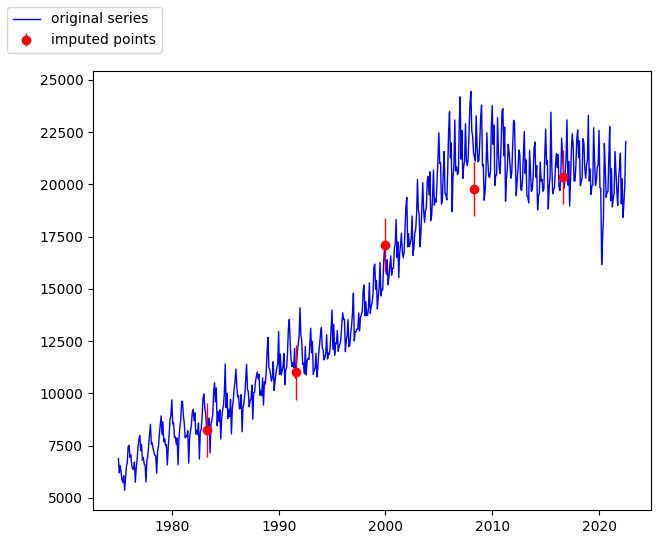

In [6]:
cissa_object.figures.get('cissa').get('figure_gap_fill')

## Let's see the error...

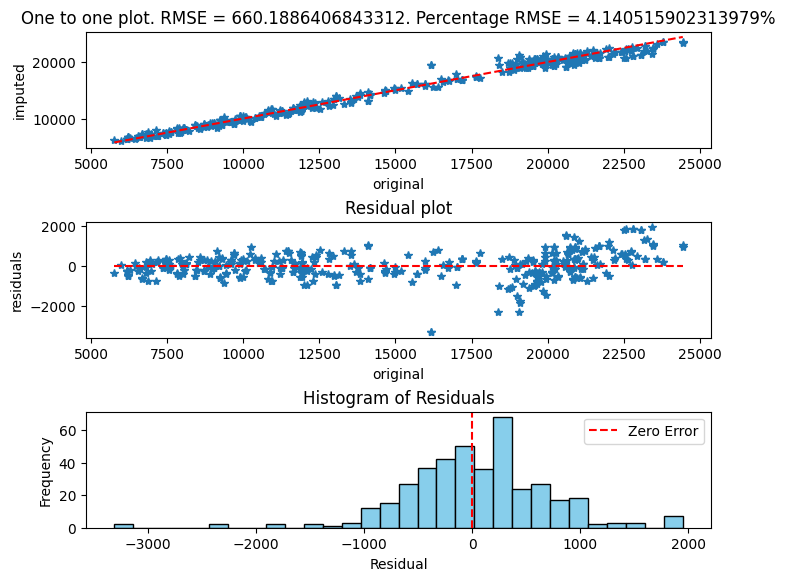

In [7]:
cissa_object.figures.get('cissa').get('figure_gap_fill_error')

## Lets try a smaller value of L, but we will use the pre_fill_gaps function so that we can run CiSSA after with a larger window size.

In [8]:
#create the cissa object
cissa_object_small_L = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])

In [9]:
#here we choose a window length of 2 years. You can try other windown lengths to see how it effects the error rate
#we add some parameters to control the gap filling
cissa_object_small_L.pre_fill_gaps(L = 12*2,
                       K_surrogates = 5, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling. For 10 repeats we remove 10 known points, gap fill, and calculate the error. On the last run all points are included (none removed) 
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 500, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value is 50 - adjust this for your time series
                        verbose = True #just so we can see what is going on...
                       )

Step 0 of 10
iteration 0.  5773.404018419744  vs target error:  50
iteration 1.  1184.771728046977  vs target error:  50
iteration 2.  245.09132447023876  vs target error:  50
iteration 3.  62.746443269978045  vs target error:  50
iteration 4.  19.575879129079112  vs target error:  50
Step 1 of 10
iteration 0.  5014.330204717764  vs target error:  50
iteration 1.  1304.232552451289  vs target error:  50
iteration 2.  416.5611189055235  vs target error:  50
iteration 3.  125.13089569216754  vs target error:  50
iteration 4.  37.327426678704796  vs target error:  50
Step 2 of 10
iteration 0.  5014.330204717753  vs target error:  50
iteration 1.  1044.6521259828733  vs target error:  50
iteration 2.  316.5911817044762  vs target error:  50
iteration 3.  112.888879155822  vs target error:  50
iteration 4.  40.2667646507598  vs target error:  50
Step 3 of 10
iteration 0.  5601.871037011137  vs target error:  50
iteration 1.  1627.7420588153145  vs target error:  50
iteration 2.  522.1018774

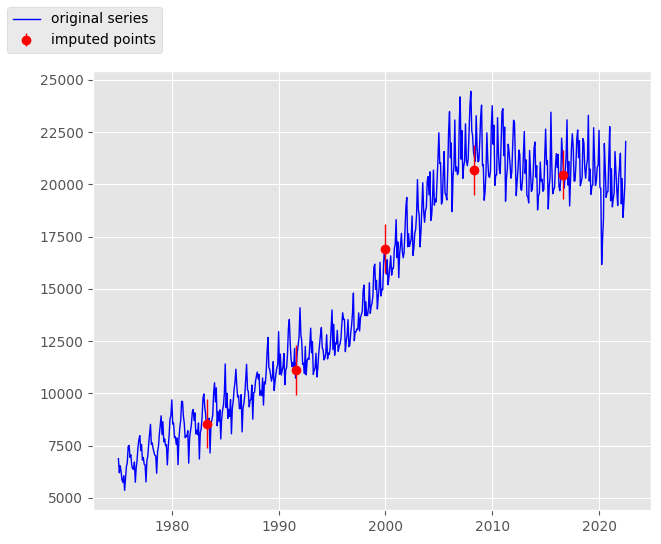

In [10]:
cissa_object_small_L.figures.get('cissa').get('figure_gap_fill')

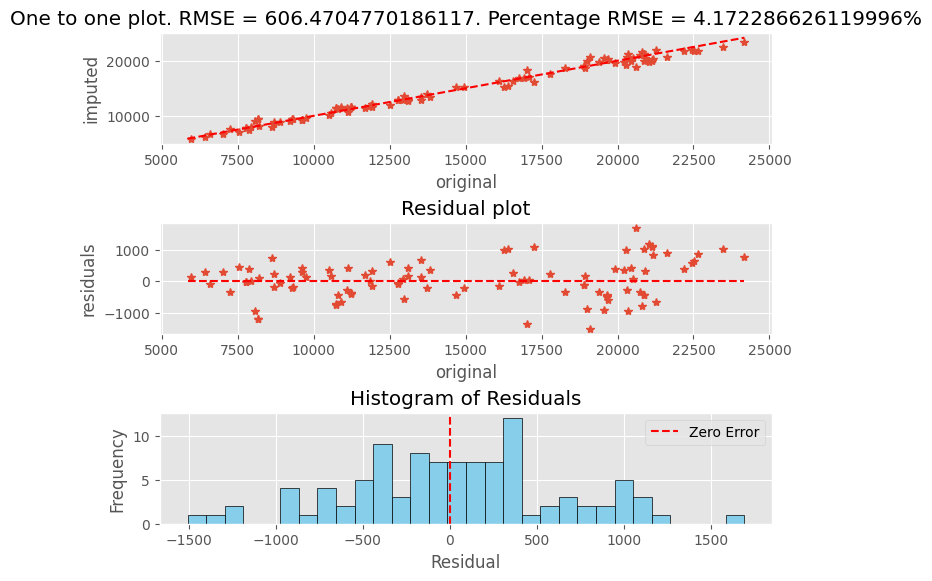

In [11]:
cissa_object_small_L.figures.get('cissa').get('figure_gap_fill_error')

In [12]:
print('''COMPONENT VARIANCE''')
print(f'''TREND   : {cissa_object.results.get('cissa').get('noise component tests').get('trend_share')}%''')
print(f'''PERIODIC: {cissa_object.results.get('cissa').get('noise component tests').get('periodic_share')}%''')
print(f'''NOISE   : {cissa_object.results.get('cissa').get('noise component tests').get('noise_share')}%''')

COMPONENT VARIANCE
TREND   : 93.01824192408378%
PERIODIC: 2.1969415454358368%
NOISE   : 4.534414770968099%


### we could then rerun auto cissa with a larger window

In [13]:
cissa_object_gap_fixed = cissa_object_small_L = Cissa(t=data_with_gaps['Date'],x=cissa_object_small_L.x)
cissa_object_gap_fixed.auto_cissa(L = 12*5,
                       K_surrogates = 5, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       )

Checking for censored or nan data...
RUNNING CISSA!
Performing monte-carlo significance analysis...
Grouping components...
Running frequency time analysis...
Analysing trend...
Calculating time-series autocorrelation...
running peridogram analysis

                 Breakpoint Model Comparision Results                 
n_breakpoints            BIC    converged          RSS 
----------------------------------------------------------------------------------------------------
0                    -74.149         True       1.1683 
1                    -76.968         True       0.8159 

Min BIC (Bayesian Information Criterion) suggests best model
Auto Cissa Complete!


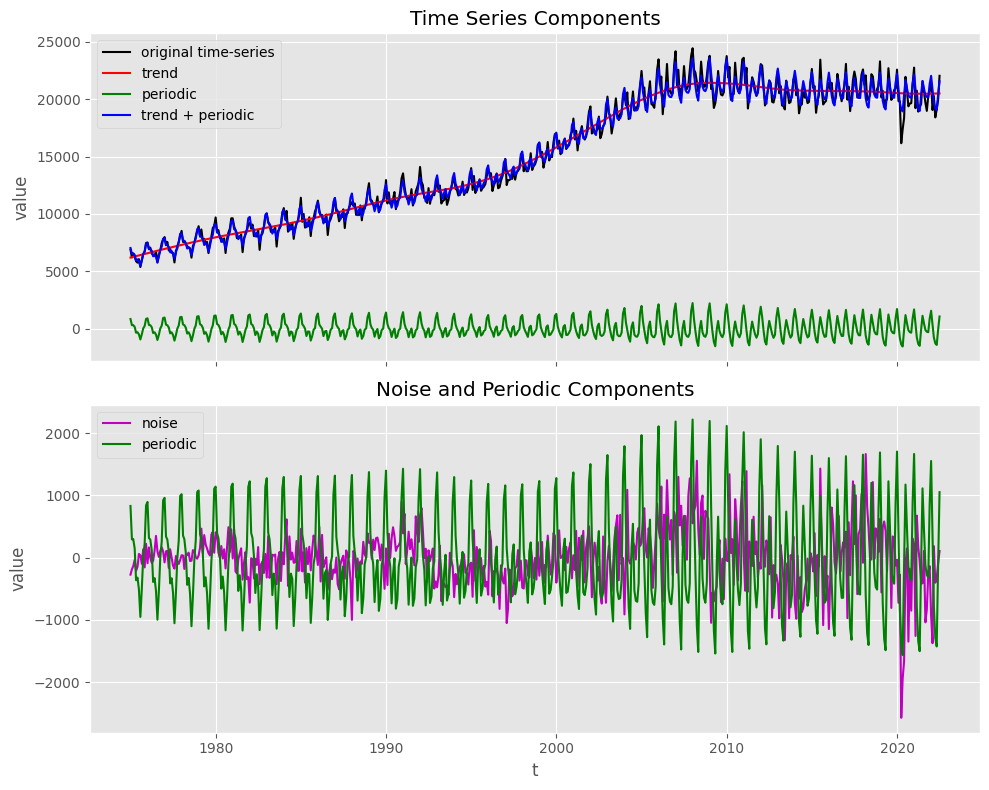

In [14]:
cissa_object_gap_fixed.figures.get('cissa').get('figure_split_components')

# Now let's try approximating then removing trend and refitting the gaps...

In [15]:
cissa_object_no_trend = Cissa(t=data_with_gaps['Date'],
                              x=data_with_gaps['Electric power consumption in Spain'] - cissa_object.x_trend)

In [16]:
#here we choose a window length of 5 years. You can try other windown lengths to see how it effects the error rate
#we add some parameters to control the gap filling
cissa_object_no_trend.auto_cissa(L = 12*5,
                       K_surrogates = 5, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling. For 10 repeats we remove 10 known points, gap fill, and calculate the error. On the last run all points are included (none removed) 
                       initial_guess = ['previous', 1.25], #this means we set missing values to the previous good value multiplied by 1.25 
                        max_iter = 500, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value is 50
                        verbose = True #just so we can see what is going on...
                       )

Checking for censored or nan data...
Step 0 of 10
iteration 0.  1601.3147807865817  vs target error:  50
iteration 1.  213.5165293797416  vs target error:  50
iteration 2.  29.623203512213422  vs target error:  50
Step 1 of 10
iteration 0.  2134.7485989257307  vs target error:  50
iteration 1.  750.4370911534164  vs target error:  50
iteration 2.  86.40701812393877  vs target error:  50
iteration 3.  9.990462610059012  vs target error:  50
Step 2 of 10
iteration 0.  1267.790691490915  vs target error:  50
iteration 1.  126.69949301216977  vs target error:  50
iteration 2.  17.148468352491136  vs target error:  50
Step 3 of 10
iteration 0.  1096.1271444179106  vs target error:  50
iteration 1.  606.1047995213657  vs target error:  50
iteration 2.  93.93401749690264  vs target error:  50
iteration 3.  20.016898034527628  vs target error:  50
Step 4 of 10
iteration 0.  1717.826039431407  vs target error:  50
iteration 1.  210.70700631059094  vs target error:  50
iteration 2.  26.354149333

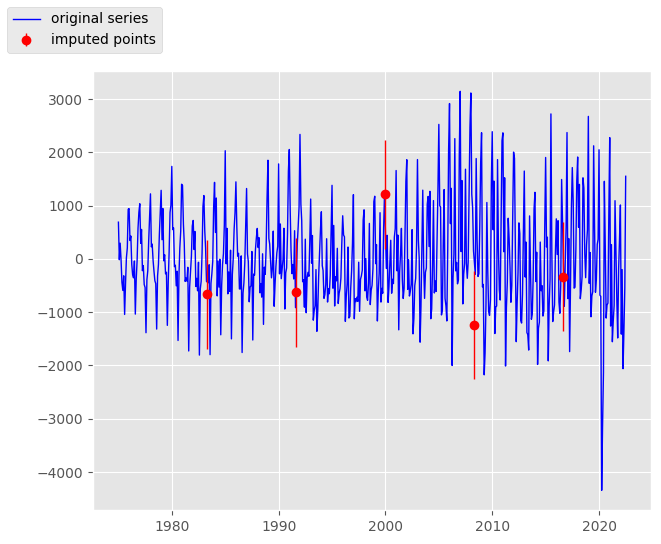

In [17]:
cissa_object_no_trend.figures.get('cissa').get('figure_gap_fill')

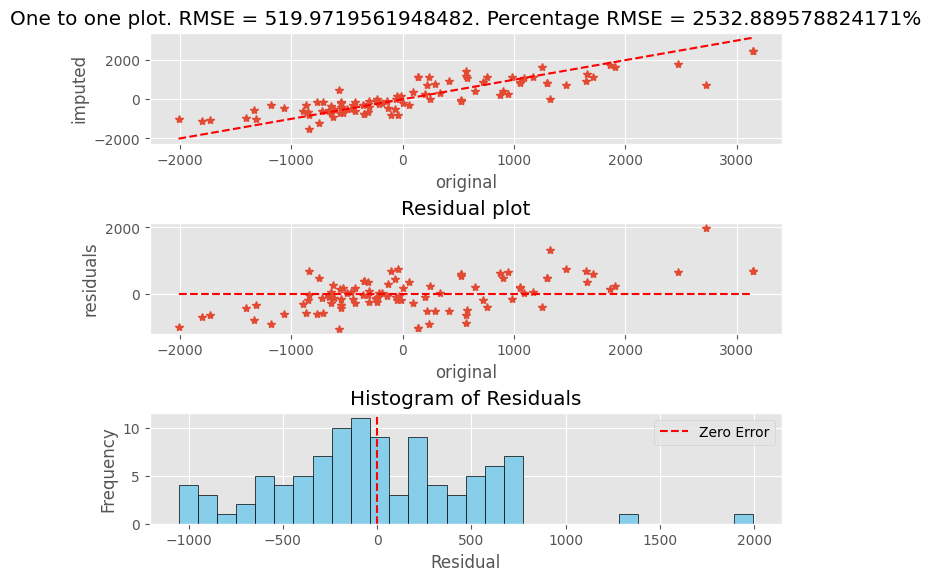

In [18]:
cissa_object_no_trend.figures.get('cissa').get('figure_gap_fill_error')